**O que esperamos:**

▪Gostaríamos  de  saber  quais  são  5  rotas  mais  pontuais  para  que  possamos recomendar  aos  nossos clientes;

▪Principais rotas por aeroporto;

▪Número de voos por Cia Aérea (Utilizar nome completo) ;

▪Plotar num mapa a visualização das rotas dos voos com saída de Guarulhos;

▪Média dosatrasosdos voos em minutos por Cia Aérea (usar box blot);

▪Quais os dias da semana com maior frequência de atraso por Cia Área;

▪Um Dash Bônus, utilizar a sua experiência em análise de dados e trazer informações relevantes com os dados obtidos.

▪Que você utilize alguma ferramenta de BI, para demonstrar graficamente os dados

# Importando bibliotecas e fazendo ajustes ao  Dataset

In [1]:
#Incialmente importando as bibliotecas que acho necessárias
import pandas as pd
import numpy as np 
import re
import datetime as dt
import calendar
import matplotlib.pyplot as plt

In [2]:
#lendo o dataset 

df= pd.read_csv('C:/Users/User/Desktop/Case Intelipost/BrFlights2.csv',encoding = 'latin1' )

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542519 entries, 0 to 2542518
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Voos                  object 
 1   Companhia.Aerea       object 
 2   Codigo.Tipo.Linha     object 
 3   Partida.Prevista      object 
 4   Partida.Real          object 
 5   Chegada.Prevista      object 
 6   Chegada.Real          object 
 7   Situacao.Voo          object 
 8   Codigo.Justificativa  object 
 9   Aeroporto.Origem      object 
 10  Cidade.Origem         object 
 11  Estado.Origem         object 
 12  Pais.Origem           object 
 13  Aeroporto.Destino     object 
 14  Cidade.Destino        object 
 15  Estado.Destino        object 
 16  Pais.Destino          object 
 17  LongDest              float64
 18  LatDest               float64
 19  LongOrig              float64
 20  LatOrig               float64
dtypes: float64(4), object(17)
memory usage: 407.4+ MB


In [4]:
df.head()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,...,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
2,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
3,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
4,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473


## Organizando Dataset


In [5]:
#padronizando colunas
df.columns = [cols.lower().replace('.','_').strip() for cols in df.columns]

#trabalhando com um Dataset com voos Nacionais
df1 = df.query('codigo_tipo_linha == "Nacional"').reset_index(drop = True)

In [6]:
#renomeando nomes das empresas aereas

comp = {'AZUL':'Azul Linhas Aereas Brasileiras S.A.','GOL':'Gol Linhas Aereas','TAM':'LATAM Airlines Brasil','TOTAL':'Total Linhas Aereas','FLYWAYS':'FlyWays Linhas Aereas','MAP LINHAS AEREAS': 'Map Linhas aereas', 'AVIANCA BRASIL': 'Avianca Airlines'}
df1['companhia_aerea'] = df1['companhia_aerea'].map(comp)
df1.head()

,voos,companhia_aerea,codigo_tipo_linha,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,codigo_justificativa,aeroporto_origem,...,estado_origem,pais_origem,aeroporto_destino,cidade_destino,estado_destino,pais_destino,longdest,latdest,longorig,latorig
0,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-05T08:25:00Z,2016-01-05T10:52:00Z,2016-01-05T09:32:00Z,2016-01-05T11:40:00Z,Realizado,TROCA DE AERONAVE,Guarulhos - Governador Andre Franco Montoro,...,SP,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553
1,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-07T08:25:00Z,2016-01-07T08:09:00Z,2016-01-07T09:32:00Z,2016-01-07T09:12:00Z,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,SP,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553
2,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-04T08:25:00Z,2016-01-04T08:31:00Z,2016-01-04T09:32:00Z,2016-01-04T09:25:00Z,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,SP,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553
3,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-06T08:25:00Z,2016-01-06T08:17:00Z,2016-01-06T09:32:00Z,2016-01-06T09:16:00Z,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,SP,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553
4,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-08T08:25:00Z,2016-01-08T08:15:00Z,2016-01-08T09:32:00Z,2016-01-08T09:12:00Z,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,SP,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553


In [7]:
#usando datetime para correção dos horários
df1['partida_prevista'] = pd.to_datetime(df1['partida_prevista'])
df1['partida_real'] = pd.to_datetime(df1['partida_real'])
df1['chegada_prevista'] = pd.to_datetime(df1['chegada_prevista'])
df1['chegada_real'] = pd.to_datetime(df1['chegada_real'])

In [8]:
#criando uma coluna com o ano para separar quantidade de voos por ano

df1['ano'] = df1['partida_prevista'].apply(lambda x: x.year)
df1.head()

,voos,companhia_aerea,codigo_tipo_linha,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,codigo_justificativa,aeroporto_origem,...,pais_origem,aeroporto_destino,cidade_destino,estado_destino,pais_destino,longdest,latdest,longorig,latorig,ano
0,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-05 08:25:00+00:00,2016-01-05 10:52:00+00:00,2016-01-05 09:32:00+00:00,2016-01-05 11:40:00+00:00,Realizado,TROCA DE AERONAVE,Guarulhos - Governador Andre Franco Montoro,...,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553,2016
1,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-07 08:25:00+00:00,2016-01-07 08:09:00+00:00,2016-01-07 09:32:00+00:00,2016-01-07 09:12:00+00:00,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553,2016
2,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-04 08:25:00+00:00,2016-01-04 08:31:00+00:00,2016-01-04 09:32:00+00:00,2016-01-04 09:25:00+00:00,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553,2016
3,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-06 08:25:00+00:00,2016-01-06 08:17:00+00:00,2016-01-06 09:32:00+00:00,2016-01-06 09:16:00+00:00,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553,2016
4,AZU - 2400,Azul Linhas Aereas Brasileiras S.A.,Nacional,2016-01-08 08:25:00+00:00,2016-01-08 08:15:00+00:00,2016-01-08 09:32:00+00:00,2016-01-08 09:12:00+00:00,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,...,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-46.478126,-23.434553,2016


# Gostaríamos de saber quais são 5 rotas mais pontuais para que possamos recomendar aos nossos clientes

In [9]:
#def função para converter hora em minutos

def convert_to_minutes(x):
    return x.total_seconds() / 60

In [10]:
#verificando os atrasos e definindo em uma nova coluna no dataframe

df1['atraso_de_partida'] = (df1['partida_real'] - df1['partida_prevista']).apply(convert_to_minutes)
df1['atraso_de_chegada'] = (df1['chegada_real'] - df1['chegada_prevista']).apply(convert_to_minutes)
df1['total_atraso'] = ((df1['partida_real'] - df1['partida_prevista']).apply(convert_to_minutes)) + ((df1['chegada_real'] - df1['chegada_prevista']).apply(convert_to_minutes))

## *Criando uma coluna para visualizar melhor as rotas*

In [11]:
#criando coluna com rotas

df1 = df1.assign(rotas = df1['cidade_origem'] +'-'+ df1['cidade_destino'])


In [12]:
rotas_pont = df1.query('atraso_de_partida == 0')

In [13]:
rotas1 = rotas_pont[['aeroporto_origem' ,'rotas','atraso_de_partida']]

In [14]:
rotas1.value_counts().head().to_frame().rename({0:'Total'}, axis = 1)

,,,Total
aeroporto_origem,rotas,atraso_de_partida,
Congonhas,Sao Paulo-Rio De Janeiro,0.0,17509
Presidente Juscelino Kubitschek,Brasilia-Rio De Janeiro,0.0,15092
Guarulhos - Governador Andre Franco Montoro,Guarulhos-Salvador,0.0,11727
Deputado Luis Eduardo Magalhaes,Salvador-Guarulhos,0.0,11368
Guarulhos - Governador Andre Franco Montoro,Guarulhos-Rio De Janeiro,0.0,11365


# Principais rotas por aeroporto

In [15]:
rotas = df1[['aeroporto_origem','rotas']].value_counts().to_frame().reset_index().rename(columns = {0:'total'})
rotas.head(10)

,aeroporto_origem,rotas,total
0,Congonhas,Sao Paulo-Rio De Janeiro,24560
1,Viracopos,Campinas-Rio De Janeiro,21411
2,Presidente Juscelino Kubitschek,Brasilia-Rio De Janeiro,21269
3,Guarulhos - Governador Andre Franco Montoro,Guarulhos-Rio De Janeiro,20105
4,Guarulhos - Governador Andre Franco Montoro,Guarulhos-Salvador,18321
5,Guarulhos - Governador Andre Franco Montoro,Guarulhos-Porto Alegre,17077
6,Salgado Filho,Porto Alegre-Guarulhos,16984
7,Afonso Pena,Sao Jose Dos Pinhais-Guarulhos,16008
8,Guarulhos - Governador Andre Franco Montoro,Guarulhos-Sao Jose Dos Pinhais,15735
9,Deputado Luis Eduardo Magalhaes,Salvador-Guarulhos,15644


# Número de voos por Cia aérea

*Apresentando quantidade de voos por ano e por Cia*

In [16]:
qtd_voos = df1[['aeroporto_origem','companhia_aerea','situacao_voo','ano','codigo_justificativa','rotas']]

In [17]:
cancelado = qtd_voos.query('situacao_voo == "Cancelado"').value_counts().reset_index().rename(columns = {0:'total_cancelados'})
realizado = qtd_voos.query('situacao_voo == "Realizado"').value_counts().reset_index().rename(columns = {0:'total_realizados'})

In [18]:
realizado[['companhia_aerea','total_realizados']].groupby(['companhia_aerea']).sum()

,total_realizados
companhia_aerea,
Avianca Airlines,33757
Azul Linhas Aereas Brasileiras S.A.,426593
FlyWays Linhas Aereas,183
Gol Linhas Aereas,105052
LATAM Airlines Brasil,67098
Map Linhas aereas,3446
Total Linhas Aereas,1283


In [19]:
cancelado[['companhia_aerea','total_cancelados']].groupby(['companhia_aerea']).sum()

,total_cancelados
companhia_aerea,
Avianca Airlines,5995
Azul Linhas Aereas Brasileiras S.A.,49434
FlyWays Linhas Aereas,473
Gol Linhas Aereas,86782
LATAM Airlines Brasil,30401
Map Linhas aereas,16
Total Linhas Aereas,16


# Plotar num mapa a visualização das rotas dos voos com saída de Guarulhos

*Para melhor Visualizar o Mapa escolhi por plotar no Tableau*


[Mapa_Tableau](https://public.tableau.com/profile/wagner2294#!/vizhome/PrimeiroCase/Histria1)

# Média dos atrasos dos voos em minutos por Cia Aérea (usar box blot)

In [20]:
atraso_media = df1[['companhia_aerea','atraso_de_partida','atraso_de_chegada', 'total_atraso']]

In [21]:
atraso_media.describe()

,atraso_de_partida,atraso_de_chegada,total_atraso
count,1.607202e+06,1.607202e+06,1.607202e+06
mean,6.986801e-01,1.020390e+00,1.719070e+00
std,3.988995e+02,3.738637e+02,7.603018e+02
min,-4.156200e+04,-4.156700e+04,-8.312900e+04
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00
max,1.585200e+04,1.589400e+04,3.171100e+04


In [22]:
atrasos_m = atraso_media.groupby(['companhia_aerea']).mean()
atrasos_m.describe()

,atraso_de_partida,atraso_de_chegada,total_atraso
count,7.000000,7.000000,7.000000
mean,1.746766,-0.818301,0.928466
std,34.088075,30.166870,64.019743
min,-57.629460,-59.844705,-117.474165
25%,-0.531589,-0.438817,-0.608972
50%,3.223899,3.965201,6.466232
75%,3.789364,4.278610,8.067974
max,60.117375,42.471815,102.589189


In [23]:
atrasos_m['atraso_de_chegada']

companhia_aerea
Avianca Airlines                        4.095381
Azul Linhas Aereas Brasileiras S.A.    -4.105965
FlyWays Linhas Aereas                   4.461840
Gol Linhas Aereas                       3.965201
LATAM Airlines Brasil                   3.228330
Map Linhas aereas                     -59.844705
Total Linhas Aereas                    42.471815
Name: atraso_de_chegada, dtype: float64

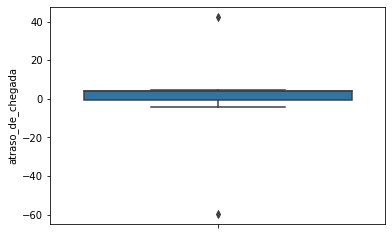

In [24]:
import seaborn as sns
sns.boxplot(y = atrasos_m['atraso_de_chegada'])
plt.show()

***em negativo, o voo foi adiantado***

# Quais os dias da semana com maior frequência de atraso por Cia Área;

## *Adicionando Dias da semana no DataFrame*

In [25]:
df1 = df1.assign(dia_semana = df1['partida_prevista'].apply(lambda x: x.day_name()))
dias = {'Monday':'Segunda-Feira','Tuesday':'Terca-Feira','Wednesday':'Quarta-Feira','Thursday':'Quinta-Feira','Friday':'Sexta-Feira','Saturday':'Sabado','Sunday':'Domingo'}
test= df1['dia_semana']
df1['dia_semana'] = test.map(dias)

In [26]:
atraso_dia0= df1[['atraso_de_partida','atraso_de_chegada','total_atraso','dia_semana','situacao_voo', 'companhia_aerea','ano']]

In [27]:
atraso_dia = atraso_dia0.query('atraso_de_partida >= 0')

In [28]:
atraso_dia.groupby(['dia_semana']).mean().drop('ano', axis = 1)

,atraso_de_partida,atraso_de_chegada,total_atraso
dia_semana,,,
Domingo,7.041713,5.755377,12.797090
Quarta-Feira,7.547198,7.317485,14.864683
Quinta-Feira,8.265181,8.188260,16.453441
Sabado,6.292684,5.800459,12.093144
Segunda-Feira,33.990432,33.841594,67.832027
Sexta-Feira,12.267168,8.400687,20.667855
Terca-Feira,22.310430,22.034701,44.345131


In [29]:
 soma_atraso = atraso_dia.groupby(['companhia_aerea','dia_semana']).mean().drop('ano', axis=1)

In [30]:
print('Os números negativos apresentados significa os voos adiantados')
soma_atraso

Os números negativos apresentados significa os voos adiantados


atraso_de_partida  \
companhia_aerea                     dia_semana                         
Avianca Airlines                    Domingo                 6.553989   
                                    Quarta-Feira            7.796678   
                                    Quinta-Feira            8.310556   
                                    Sabado                  6.666537   
                                    Segunda-Feira          19.558257   
                                    Sexta-Feira            24.277536   
                                    Terca-Feira            13.102934   
Azul Linhas Aereas Brasileiras S.A. Domingo                11.790093   
                                    Quarta-Feira           16.119402   
                                    Quinta-Feira           15.078305   
                                    Sabado                 12.416799   
                                    Segunda-Feira         123.158406   
                                    Sexta-Feira            14.771375   
                                    Terca-Feira            75.987515   
FlyWays Linhas Aereas               Quarta-Feira            1.942065   
                                    Quinta-Feira            3.883721   
                                    Segunda-Feira           4.877301   
                                    Sexta-Feira             8.072727   
                                    Terca-Feira             0.714894   
Gol Linhas Aereas                   Domingo                 4.020259   
                                    Quarta-Feira            4.641992   
                                    Quinta-Feira            6.153734   
                                    Sabado                  4.256326   
                                    Segunda-Feira          12.554193   
                                    Sexta-Feira             7.002124   
                                    Terca-Feira             8.377793   
LATAM Airlines Brasil               Domingo                 8.910489   
                                    Quarta-Feira            5.305691   
                                    Quinta-Feira            6.174058   
                                    Sabado                  5.125997   
                                    Segunda-Feira          11.990697   
                                    Sexta-Feira            12.612918   
                                    Terca-Feira             9.395356   
Map Linhas aereas                   Domingo                34.117647   
                                    Quarta-Feira           39.421829   
                                    Quinta-Feira           57.825000   
                                    Sabado                 48.239234   
                                    Segunda-Feira          32.334884   
                                    Sexta-Feira            69.182243   
                                    Terca-Feira            37.748387   
Total Linhas Aereas                 Quarta-Feira           88.853801   
                                    Quinta-Feira          115.270270   
                                    Sabado                108.895833   
                                    Segunda-Feira         390.937500   
                                    Sexta-Feira           231.084746   
                                    Terca-Feira            81.848485   

                                                   atraso_de_chegada  \
companhia_aerea                     dia_semana                         
Avianca Airlines                    Domingo                 6.576379   
                                    Quarta-Feira            8.004868   
                                    Quinta-Feira            8.613871   
                                    Sabado                  6.215968   
                                    Segunda-Feira          19.744220   
                                    Sexta-Feira             9.896147   
                  

## *Tirando a média de atrasos por dia da semana*

In [31]:
atraso_dia.groupby('dia_semana').mean().drop('ano', axis = 1)

,atraso_de_partida,atraso_de_chegada,total_atraso
dia_semana,,,
Domingo,7.041713,5.755377,12.797090
Quarta-Feira,7.547198,7.317485,14.864683
Quinta-Feira,8.265181,8.188260,16.453441
Sabado,6.292684,5.800459,12.093144
Segunda-Feira,33.990432,33.841594,67.832027
Sexta-Feira,12.267168,8.400687,20.667855
Terca-Feira,22.310430,22.034701,44.345131


In [32]:
media_atraso = atraso_dia.groupby(['companhia_aerea','dia_semana']).mean().drop('ano', axis = 1)

In [33]:
print('Os números negativos apresentados significa os voos adiantados')
media_atraso

Os números negativos apresentados significa os voos adiantados


atraso_de_partida  \
companhia_aerea                     dia_semana                         
Avianca Airlines                    Domingo                 6.553989   
                                    Quarta-Feira            7.796678   
                                    Quinta-Feira            8.310556   
                                    Sabado                  6.666537   
                                    Segunda-Feira          19.558257   
                                    Sexta-Feira            24.277536   
                                    Terca-Feira            13.102934   
Azul Linhas Aereas Brasileiras S.A. Domingo                11.790093   
                                    Quarta-Feira           16.119402   
                                    Quinta-Feira           15.078305   
                                    Sabado                 12.416799   
                                    Segunda-Feira         123.158406   
                                    Sexta-Feira            14.771375   
                                    Terca-Feira            75.987515   
FlyWays Linhas Aereas               Quarta-Feira            1.942065   
                                    Quinta-Feira            3.883721   
                                    Segunda-Feira           4.877301   
                                    Sexta-Feira             8.072727   
                                    Terca-Feira             0.714894   
Gol Linhas Aereas                   Domingo                 4.020259   
                                    Quarta-Feira            4.641992   
                                    Quinta-Feira            6.153734   
                                    Sabado                  4.256326   
                                    Segunda-Feira          12.554193   
                                    Sexta-Feira             7.002124   
                                    Terca-Feira             8.377793   
LATAM Airlines Brasil               Domingo                 8.910489   
                                    Quarta-Feira            5.305691   
                                    Quinta-Feira            6.174058   
                                    Sabado                  5.125997   
                                    Segunda-Feira          11.990697   
                                    Sexta-Feira            12.612918   
                                    Terca-Feira             9.395356   
Map Linhas aereas                   Domingo                34.117647   
                                    Quarta-Feira           39.421829   
                                    Quinta-Feira           57.825000   
                                    Sabado                 48.239234   
                                    Segunda-Feira          32.334884   
                                    Sexta-Feira            69.182243   
                                    Terca-Feira            37.748387   
Total Linhas Aereas                 Quarta-Feira           88.853801   
                                    Quinta-Feira          115.270270   
                                    Sabado                108.895833   
                                    Segunda-Feira         390.937500   
                                    Sexta-Feira           231.084746   
                                    Terca-Feira            81.848485   

                                                   atraso_de_chegada  \
companhia_aerea                     dia_semana                         
Avianca Airlines                    Domingo                 6.576379   
                                    Quarta-Feira            8.004868   
                                    Quinta-Feira            8.613871   
                                    Sabado                  6.215968   
                                    Segunda-Feira          19.744220   
                                    Sexta-Feira             9.896147   
                  

*Criando variaveis com cada Cia aerea*

In [34]:
atrasos = df1[['total_atraso','dia_semana','situacao_voo', 'companhia_aerea', 'ano']]
atrasos

,total_atraso,dia_semana,situacao_voo,companhia_aerea,ano
0,275.0,Terca-Feira,Realizado,Azul Linhas Aereas Brasileiras S.A.,2016
1,-36.0,Quinta-Feira,Realizado,Azul Linhas Aereas Brasileiras S.A.,2016
2,-1.0,Segunda-Feira,Realizado,Azul Linhas Aereas Brasileiras S.A.,2016
3,-24.0,Quarta-Feira,Realizado,Azul Linhas Aereas Brasileiras S.A.,2016
4,-30.0,Sexta-Feira,Realizado,Azul Linhas Aereas Brasileiras S.A.,2016
...,...,...,...,...,...
1780314,19.0,Quarta-Feira,Realizado,Total Linhas Aereas,2015
1780315,-34.0,Quinta-Feira,Realizado,Total Linhas Aereas,2015
1780316,2438.0,Quinta-Feira,Realizado,Total Linhas Aereas,2015
1780317,-37.0,Quinta-Feira,Realizado,Total Linhas Aereas,2015


In [36]:
azul = atrasos.query('companhia_aerea == "Azul Linhas Aereas Brasileiras S.A."').groupby(['ano','dia_semana']).mean()

gol = atrasos.query('companhia_aerea == "Gol Linhas Aereas"').groupby(['ano','dia_semana']).mean()

avianca = atrasos.query('companhia_aerea == "Avianca Airlines"').groupby(['ano','dia_semana']).mean()

map_aereo = atrasos.query('companhia_aerea == "Map Linhas aereas"').groupby(['ano','dia_semana']).mean()

tam = atrasos.query('companhia_aerea == "LATAM Airlines Brasil"').groupby(['ano','dia_semana']).mean()

total_aereo = atrasos.query('companhia_aerea == "Total Linhas Aereas"').groupby(['ano','dia_semana']).mean()

flyways = atrasos.query('companhia_aerea == "FlyWays Linhas Aereas"').groupby(['ano','dia_semana']).mean()

In [37]:
azul

total_atraso
ano  dia_semana                 
2015 Domingo          -12.181310
     Quarta-Feira      -9.108717
     Quinta-Feira      -6.642084
     Sabado           -21.243604
     Segunda-Feira     -7.247204
     Sexta-Feira       -6.950877
     Terca-Feira       -9.092572
2016 Domingo          -14.569659
     Quarta-Feira     -43.838391
     Quinta-Feira    -266.011982
     Sabado          -104.128801
     Segunda-Feira    231.002956
     Sexta-Feira      -16.694642
     Terca-Feira      119.727026
2017 Domingo           -3.425179
     Quarta-Feira      -3.585437
     Quinta-Feira      -6.546952
     Sabado            -6.752057
     Segunda-Feira     -0.813715
     Sexta-Feira        1.708302
     Terca-Feira       -0.459251

# Um Dash Bônus, utilizar a sua experiência em análise de dados e trazer informações relevantes com os dados obtidos.

In [ ]:
df1.head()

## *Quantidade Voos Realizados*

In [ ]:
realizado[['companhia_aerea','ano','total_realizados']].groupby(['companhia_aerea','ano']).sum()

In [ ]:
df_grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


## *Quantidade Voos Cancelados*

In [ ]:
cancelado[['companhia_aerea','ano','total_cancelados']].groupby(['companhia_aerea','ano']).sum()

*Funcao criada caso queira visualizar com mais facilidade os voos por ano *

In [ ]:
def comp(dataframe,coluna,string):
    return dataframe[dataframe[coluna] == string]

In [ ]:
comp(cancelado,'ano', 2016).head()

In [ ]:
import gc
gc.collect()

In [ ]:
tableau = df1.sample(100000)
tableau.to_csv('primeiro_caseV1.csv', sep = '#')